### TUTORIAL PCA: Feature selection and dimensionality reduction
#### AIMS: 
Introduce Principal component analysis for feature selection and data dimensionality
reduction
Tasks:
-pass through the notebook https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb

-could you make innovations in the notebook

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.style.use('seaborn-whitegrid')

/tmp/ipykernel_39859/3785733294.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
df = pd.read_csv('results.csv')
df = df.drop('Unnamed: 0', axis=1)

x = df[df.columns[df.columns != 'habitable']]
y = pd.DataFrame(df['habitable'])
x = x.drop(['lon','lat', 'angsep', 'maxangsep', 'hz_in', 'hz_out', 'hz_center', 'snr_1h', 'baseline', 'detected', 'snr_current','id', 'int_time', 't_slew', 'ra', 'dec'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [3]:
from sklearn.decomposition import PCA
pca = PCA() 
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
total=sum(pca.explained_variance_)
k=0
current_variance=0
while current_variance/total < 0.99999:
    current_variance += pca.explained_variance_[k]
    k=k+1
    
print(k)

8


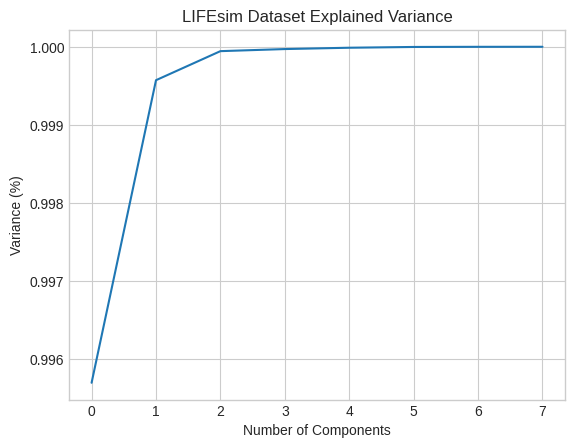

In [4]:
pca = PCA(n_components=8).fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('LIFEsim Dataset Explained Variance')
plt.show()

In [5]:
pca = PCA(n_components=8)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
# print(pca.components_)
# print(pca.explained_variance_)
print(x_train.shape)
print(x_train_pca.shape)

(9382, 28)
(9382, 8)


In [6]:
# df = pd.DataFrame.from_records(x_train)     
# corr = df.corr(method='kendall')
# plt.figure(figsize=(15,8))
# sns.heatmap(corr, annot=True)
# df.columns

In [7]:
x_train_new = pca.inverse_transform(x_train_pca)